<a href="https://colab.research.google.com/github/Muhammad-Haris-coding/1st-code/blob/main/EdaOnNetflexDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6c90ae4f9d7d21f393190a12fd10d3fc1230b929011a5450c3c669498bda7e95
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3
  Attempting uninstall:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **finding the shape of the dataset**

In [4]:
df.shape

(8807, 12)

### **Finding the datatype**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Finding the missing values**

In [6]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


How the data look mathimatically

In [7]:
df.describe( )

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Are there any duplicated values**

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.sample(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7571,s7572,TV Show,Nature's Great Events (2009),NaN,David Attenborough,"United States, United Kingdom","October 10, 2015",2009,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This series looks at how seasonal changes caus...
4864,s4865,Movie,Spivak,"Anthony Abrams, Adam Larson Broder","Michael Bacall, Maggie Lawson, Elden Henson, R...",United States,"May 12, 2018",2017,TV-MA,92 min,"Comedies, Independent Movies",Struggling writer Wally Spivak is stuck in a r...
3648,s3649,Movie,The Midas Touch,Chi Keung Fung,"Chapman To, Charlene Choi, Gao Yunxiang, Shati...",Hong Kong,"July 21, 2019",2013,TV-14,98 min,"Comedies, International Movies",A debt collector takes over the management of ...
2735,s2736,Movie,Magnificent,Vikas Bahl,"Shahid Kapoor, Alia Bhatt, Pankaj Kapur, Sanja...",India,"April 1, 2020",2015,TV-14,143 min,"Comedies, International Movies, Romantic Movies",An industrialist's daughter is forced to marry...
523,s524,TV Show,Marcella,NaN,"Anna Friel, Nicholas Pinnock, Sinéad Cusack, N...",United Kingdom,"July 6, 2021",2019,TV-MA,3 Seasons,"British TV Shows, Crime TV Shows, Internationa...",Her marriage just ended and she's returning to...


### **Cleaning the data**

filling the NAN value of the Directer column by 'Unknown'

In [10]:
df['director']=df['director'].fillna('unknown')
df['director'].isna().sum()


np.int64(0)

filling the cast  column NAN by Unknown

In [11]:
df['cast']=df['cast'].fillna('unknown')
df['cast'].isna().sum()

np.int64(0)

filling the country column also with the Unknown

In [12]:
df['country']=df['country'].fillna('unknown')
df['country'].isna().sum()

np.int64(0)

filling the column date added by unknown

In [13]:
df['date_added']=df['date_added'].fillna('unknown')
df['date_added'].isna().sum()

np.int64(0)

Droping the NAN rows of the rating and duration column because they are 4, 3 in number

In [14]:
df=df.dropna(subset=['rating'])
df=df.dropna(subset=['duration'])

In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Converting the date added column to date_time type

In [16]:
df['date_added']=pd.to_datetime(df['date_added'] ,format='%m %d,%y' ,errors='coerce')


### **univariate analysis**

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,NaT,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,NaT,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,NaT,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,NaT,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,NaT,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **catagorical columns**

countplot for the Type base

<Axes: xlabel='count', ylabel='type'>

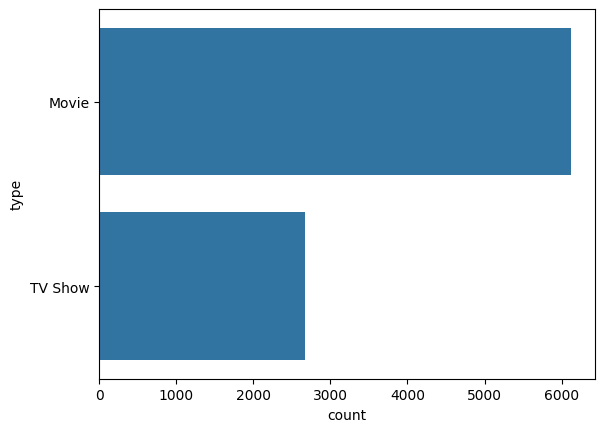

In [18]:
sns.countplot(df['type'])

pieplot for the Type column

<Axes: ylabel='count'>

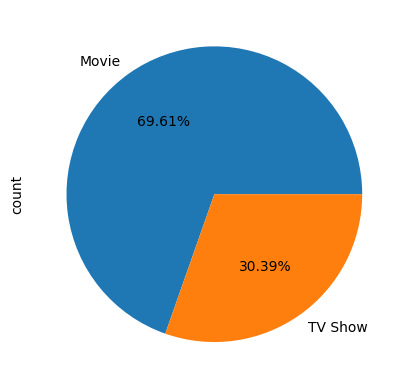

In [19]:
countvalues=df['type'].value_counts()
countvalues.plot(kind='pie',autopct='%0.2f%%')

Now for the Rating column

<Axes: xlabel='count', ylabel='rating'>

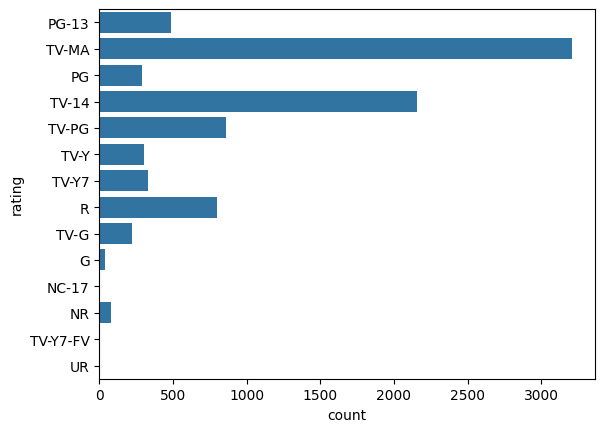

In [20]:
sns.countplot(df['rating'])

In [21]:
UR_count=df[df['rating']=='UR'].shape[0]
UR_count


3

now for the pie chart

<Axes: ylabel='count'>

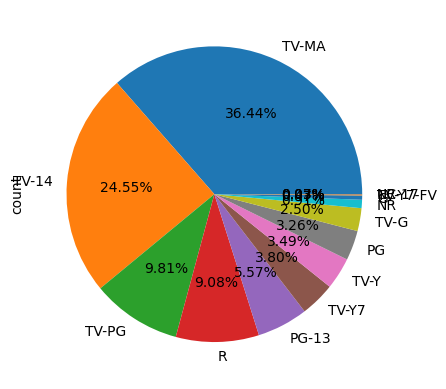

In [22]:
df['rating'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [23]:
rating_count=df['rating'].value_counts()
rating_count

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


## **numerical columns**

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,NaT,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,NaT,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,NaT,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,NaT,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,NaT,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [36]:
directer_count=df['director'].value_counts()


<Axes: xlabel='count', ylabel='Count'>

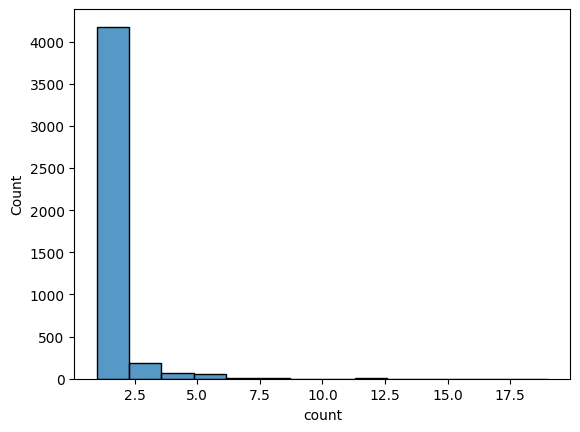

In [40]:
sns.histplot(x=directer_count[1:])